<a href="https://colab.research.google.com/github/KusumaatmaSyafadhi/kusumaatmas/blob/main/F1_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Pandas DataFrames**

In [112]:
drivers = pd.read_csv("https://raw.githubusercontent.com/KusumaatmaSyafadhi/kusumaatmas/main/drivers.csv")
lap_times = pd.read_csv("https://raw.githubusercontent.com/KusumaatmaSyafadhi/kusumaatmas/main/lap_times.csv")
races = pd.read_csv("https://raw.githubusercontent.com/KusumaatmaSyafadhi/kusumaatmas/main/races.csv")
circuits = pd.read_csv("https://raw.githubusercontent.com/KusumaatmaSyafadhi/kusumaatmas/main/circuits.csv")
results = pd.read_csv("https://raw.githubusercontent.com/KusumaatmaSyafadhi/kusumaatmas/main/results.csv")
status = pd.read_csv("https://raw.githubusercontent.com/KusumaatmaSyafadhi/kusumaatmas/main/status.csv")

In [113]:
drivers.head(846)

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
841,843,brendon_hartley,28,HAR,Brendon,Hartley,1989-11-10,New Zealander,http://en.wikipedia.org/wiki/Brendon_Hartley
842,844,leclerc,16,LEC,Charles,Leclerc,1997-10-16,Monegasque,http://en.wikipedia.org/wiki/Charles_Leclerc
843,845,sirotkin,35,SIR,Sergey,Sirotkin,1995-08-27,Russian,http://en.wikipedia.org/wiki/Sergey_Sirotkin_(...
844,846,norris,4,NOR,Lando,Norris,1999-11-13,British,http://en.wikipedia.org/wiki/Lando_Norris


In [114]:
lap_times.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [115]:
races.head()

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [116]:
circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [117]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [118]:
status.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


**Ngegabungin 2 DataFrames**

In [119]:
f1_racing = pd.merge(drivers, results)

In [120]:
f1_racing.head(5)

,driverId,driverRef,number,code,forename,surname,dob,nationality,url,resultId,raceId,constructorId,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,22148,900,131,1,\N,R,19,0.0,2,\N,\N,2,20,1:49.947,173.636,5
1,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,22152,901,131,1,1,1,1,25.0,56,1:40:25.974,6025974,53,1,1:43.066,193.611,1
2,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,22174,902,131,2,1,1,1,25.0,57,1:39:42.743,5982743,49,2,1:37.108,200.634,1
3,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,22196,903,131,1,1,1,1,25.0,54,1:33:28.338,5608338,42,2,1:41.196,193.916,1
4,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,22218,904,131,1,1,1,1,25.0,66,1:41:05.155,6065155,54,3,1:29.483,187.275,1


**Saya Pilih Data Lewis Tahun 2020 Soalnya Mau Saya Pantau, Nyari Data Max Verstappen Gak Komplit, yaudah saya pilih data Lewis saja dulu. Battle nya seru padahal :"**

In [121]:
f1_lewis = f1_racing[(f1_racing['driverId']== 1)&(f1_racing['raceId']>1030)&(f1_racing['raceId']<1048)]

In [122]:
f1_lewis.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url,resultId,raceId,constructorId,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
121,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,24629,1031,131,5,4,4,4,12.0,71,+5.689,5461428,67,3,1:07.712,229.572,1
122,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,24646,1032,131,1,1,1,1,25.0,71,1:22:50.683,4970683,68,3,1:06.719,232.989,1
123,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,24666,1033,131,1,1,1,1,26.0,70,1:36:12.473,5772473,70,1,1:16.627,205.823,1
124,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,24686,1034,131,1,1,1,1,25.0,52,1:28:01.283,5281283,45,3,1:29.238,237.652,1
125,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,24707,1035,131,2,2,2,2,19.0,52,+11.326,4793319,43,1,1:28.451,239.766,1


**Dibawah, saya buang kolom yang ngga saya butuhkan**

In [123]:
f1_lewis.drop(['url', 'dob', 'constructorId', 'positionText', 'positionOrder', 'milliseconds','fastestLapSpeed', 'rank'], axis = 1, inplace = True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [124]:
f1_lewis.head()

,driverId,driverRef,number,code,forename,surname,nationality,resultId,raceId,grid,position,points,laps,time,fastestLap,fastestLapTime,statusId
121,1,hamilton,44,HAM,Lewis,Hamilton,British,24629,1031,5,4,12.0,71,+5.689,67,1:07.712,1
122,1,hamilton,44,HAM,Lewis,Hamilton,British,24646,1032,1,1,25.0,71,1:22:50.683,68,1:06.719,1
123,1,hamilton,44,HAM,Lewis,Hamilton,British,24666,1033,1,1,26.0,70,1:36:12.473,70,1:16.627,1
124,1,hamilton,44,HAM,Lewis,Hamilton,British,24686,1034,1,1,25.0,52,1:28:01.283,45,1:29.238,1
125,1,hamilton,44,HAM,Lewis,Hamilton,British,24707,1035,2,2,19.0,52,+11.326,43,1:28.451,1


In [125]:
f1_lewis.dtypes

driverId            int64
driverRef          object
number             object
code               object
forename           object
surname            object
nationality        object
resultId            int64
raceId              int64
grid                int64
position           object
points            float64
laps                int64
time               object
fastestLap         object
fastestLapTime     object
statusId            int64
dtype: object

**Saya Rubah Tipe Data Atribut Position ke Integer karena mau saya coba visualisasikan**

In [126]:
f1_lewis['position'] = f1_lewis['position'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Setelah Diubah, Mari kita lihat tipe data yang tadi diubah :D

In [127]:
f1_lewis.dtypes

driverId            int64
driverRef          object
number             object
code               object
forename           object
surname            object
nationality        object
resultId            int64
raceId              int64
grid                int64
position            int64
points            float64
laps                int64
time               object
fastestLap         object
fastestLapTime     object
statusId            int64
dtype: object

**Di Bagian ini, saya mau visualisasiin berapa aja sih poin dan posisi yang Lewis peroleh musim 2020**

Ini untuk Visualisasi Poin berdasarkan posisi yang didapat Lewis

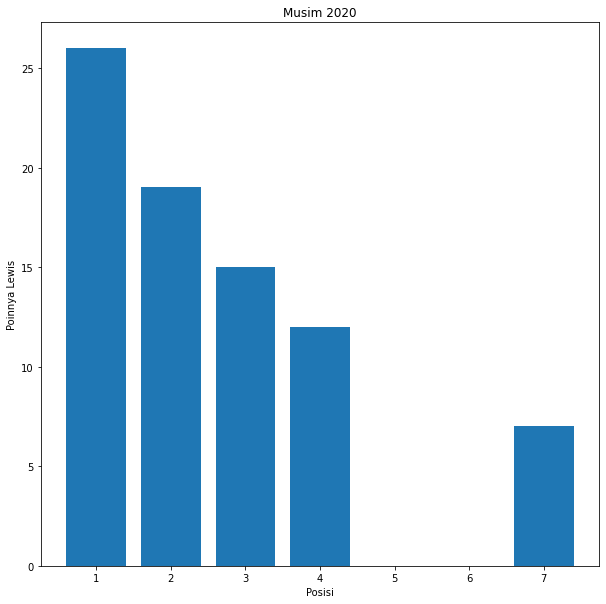

In [128]:
plt.figure(figsize=(10,10))
plt.bar(f1_lewis['position'],f1_lewis['points'])
plt.xlabel('Posisi')
plt.ylabel('Poinnya Lewis')
plt.title('Musim 2020')

plt.show()

Ternyata, Lewis pernah finish di posisi ke-7, terus mau saya coba deh liat pas kapan dia finish di posisi ke-7

In [129]:
f1_lewis

,driverId,driverRef,number,code,forename,surname,nationality,resultId,raceId,grid,position,points,laps,time,fastestLap,fastestLapTime,statusId
121,1,hamilton,44,HAM,Lewis,Hamilton,British,24629,1031,5,4,12.0,71,+5.689,67,1:07.712,1
122,1,hamilton,44,HAM,Lewis,Hamilton,British,24646,1032,1,1,25.0,71,1:22:50.683,68,1:06.719,1
123,1,hamilton,44,HAM,Lewis,Hamilton,British,24666,1033,1,1,26.0,70,1:36:12.473,70,1:16.627,1
124,1,hamilton,44,HAM,Lewis,Hamilton,British,24686,1034,1,1,25.0,52,1:28:01.283,45,1:29.238,1
125,1,hamilton,44,HAM,Lewis,Hamilton,British,24707,1035,2,2,19.0,52,+11.326,43,1:28.451,1
126,1,hamilton,44,HAM,Lewis,Hamilton,British,24726,1036,1,1,25.0,66,1:31:45.279,63,1:19.822,1
127,1,hamilton,44,HAM,Lewis,Hamilton,British,24746,1037,1,1,25.0,44,1:24:08.761,28,1:47.758,1
128,1,hamilton,44,HAM,Lewis,Hamilton,British,24772,1038,1,7,7.0,53,+17.245,34,1:22.746,1
129,1,hamilton,44,HAM,Lewis,Hamilton,British,24786,1039,1,1,26.0,59,2:19:35.060,58,1:18.833,1
130,1,hamilton,44,HAM,Lewis,Hamilton,British,24808,1040,1,3,15.0,53,+22.729,48,1:38.075,1


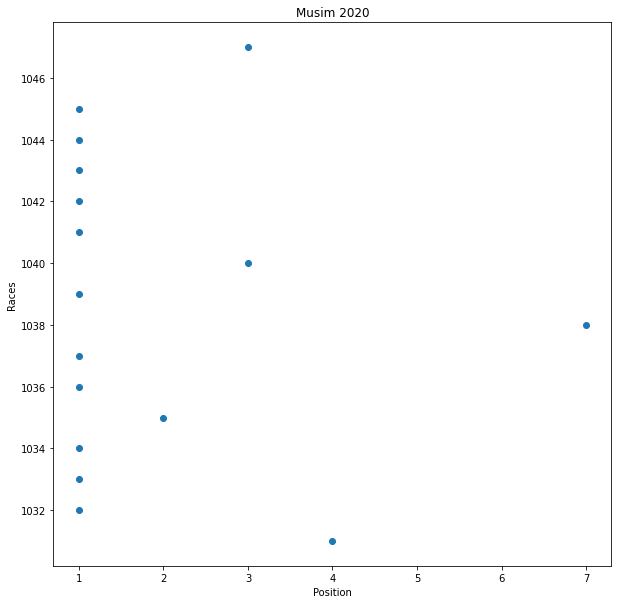

In [130]:
plt.figure(figsize=(10,10))
plt.scatter(f1_lewis['position'],f1_lewis['raceId'])
plt.xlabel('Position')
plt.ylabel('Races')
plt.title('Musim 2020')

plt.show()

Oke, jadi dia pernah finish ke-7 di race dengan ID 1038, Mari Kita Ulik Race dengan ID 1038 itu race dimana ya?

In [131]:
f1_race_7 = races[(races['raceId']== 1038)]
f1_race_7

,raceId,year,round,circuitId,name,date,time,url
1025,1038,2020,8,14,Italian Grand Prix,2020-09-06,13:10:00,https://en.wikipedia.org/wiki/2020_Italian_Gra...


Oke, Jadi dia finish ke-7 di Italian Grand Prix. Di Musim 2020, ini adalah finish terburuk Lewis Hamilton.

**Coba Kita Klasifikasikan Datanya**

In [132]:
X = f1_lewis.iloc[:, 8:10]
y = f1_lewis.iloc[:, 10] #ini kolom target
y

121    4
122    1
123    1
124    1
125    2
126    1
127    1
128    7
129    1
130    3
131    1
132    1
133    1
134    1
135    1
136    3
Name: position, dtype: int64

Coming Soon, Masih ada yang ngga normal disini hehe

In [159]:
from sklearn.model_selection import train_test_split #membagi data training dan testing

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1)
y_train

129    1
133    1
124    1
122    1
127    1
128    7
131    1
125    2
121    4
130    3
132    1
123    1
136    3
126    1
Name: position, dtype: int64

In [161]:
from sklearn.svm import SVC

clf = SVC() #SVC adalah Support Vector Classifier
clf= clf.fit(X_train, y_train) #fit untuk training
y_pred = clf.predict(X_test)

In [162]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_pred, y_test))

1.0
